<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Project 03: NYC 311 Service Request Analysis

You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.

**Happy coding!**

In [5]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
#Import 311_Service_Requests_from_2010_to_Present Dataset csv file in a Dataframe
'''it will take around 3mins'''
'''Loading data'''
df=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv",low_memory=False,parse_dates=['Created Date', 'Closed Date'])

In [7]:
#Preview the data
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [8]:
pd.set_option('precision',3)
'''Some statistic about data'''
df.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.646e+05,361560.000,3.605e+05,360528.000,0.0,0.0,0.0,0.0,0.0,360528.000,360528.000
mean,3.107e+07,10858.497,1.005e+06,203425.306,NaN,NaN,NaN,NaN,NaN,40.725,-73.925
std,7.332e+05,578.263,2.196e+04,29842.193,NaN,NaN,NaN,NaN,NaN,0.082,0.079
min,2.961e+07,83.000,9.134e+05,121185.000,NaN,NaN,NaN,NaN,NaN,40.499,-74.255
25%,3.050e+07,10314.000,9.919e+05,182945.000,NaN,NaN,NaN,NaN,NaN,40.669,-73.972
50%,3.109e+07,11209.000,1.003e+06,201023.000,NaN,NaN,NaN,NaN,NaN,40.718,-73.931
75%,3.167e+07,11238.000,1.019e+06,222790.000,NaN,NaN,NaN,NaN,NaN,40.778,-73.874
max,3.231e+07,11697.000,1.067e+06,271876.000,NaN,NaN,NaN,NaN,NaN,40.913,-73.701


In [9]:
'''Number of columns and rows'''
df.shape

(364558, 53)

In [10]:
df.replace('Unspecified',np.nan,inplace=True)

In [11]:
'''aggregating nan values'''
columns_with_nan_values=df.isnull().sum()

In [12]:
'''We Are Removing Some Coloums that have more than 50% missing data And Unnecessary column'''
size = 364558.0
remove = []
for key,value in columns_with_nan_values.items():
    k = value/size
    print(k,key)
    if (value/size) > 0.5:
        remove.append(key)
df.drop(labels = remove, axis =1, inplace =True)

(0.0, 'Unique Key')
(0.0, 'Created Date')
(0.006531196682009447, 'Closed Date')
(0.0, 'Agency')
(0.0, 'Agency Name')
(0.0, 'Complaint Type')
(0.017832553393424367, 'Descriptor')
(0.0003648253501500447, 'Location Type')
(0.008223657140976197, 'Incident Zip')
(0.1418128253940388, 'Incident Address')
(0.1418128253940388, 'Street Name')
(0.15686941446902825, 'Cross Street 1')
(0.158561874927995, 'Cross Street 2')
(0.8597753992505993, 'Intersection Street 1')
(0.8614431722798567, 'Intersection Street 2')
(0.008920391268330417, 'Address Type')
(0.008220914093230707, 'City')
(0.9989713570954416, 'Landmark')
(0.00655314106397336, 'Facility Type')
(0.0, 'Status')
(8.229143236467174e-06, 'Due Date')
(0.0, 'Resolution Description')
(0.006588800684664717, 'Resolution Action Updated Date')
(0.0, 'Community Board')
(0.008113935231156633, 'Borough')
(0.011054482414320903, 'X Coordinate (State Plane)')
(0.011054482414320903, 'Y Coordinate (State Plane)')
(0.9999972569522545, 'Park Facility Name')
(0.0

In [13]:
'''Columns with Null values and their count'''
df.isnull().sum()

Unique Key                            0
Created Date                          0
Closed Date                        2381
Agency                                0
Agency Name                           0
Complaint Type                        0
Descriptor                         6501
Location Type                       133
Incident Zip                       2998
Incident Address                  51699
Street Name                       51699
Cross Street 1                    57188
Cross Street 2                    57805
Address Type                       3252
City                               2997
Facility Type                      2389
Status                                0
Due Date                              3
Resolution Description                0
Resolution Action Updated Date     2402
Community Board                       0
Borough                            2958
X Coordinate (State Plane)         4030
Y Coordinate (State Plane)         4030
Park Borough                       2958


In [14]:
#Previously we had 53 columns, after cleaning the data 29 lefts only.
df.shape

(364558, 29)

In [15]:
'''Datatype of Each column'''
df.dtypes

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Address Type                              object
City                                      object
Facility Type                             object
Status                                    object
Due Date                                  object
Resolution Description                    object
Resolution Action Updated Date            object
Community Board     

In [16]:
#Basic exploratory data analysis

In [17]:
#Explore data

In [18]:
#Import required libraries for Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [19]:
#df1 will print the count of city for a particular complaint
df1=df.groupby('Complaint Type').City.count()

In [20]:
#Print df1
print(df1)

Complaint Type
Agency Issues                     0
Animal Abuse                  10529
Animal in a Park                  1
Bike/Roller/Skate Chronic       473
Blocked Driveway             100548
Derelict Vehicle              21460
Disorderly Youth                315
Drinking                       1401
Ferry Complaint                   0
Graffiti                        157
Homeless Encampment            4878
Illegal Fireworks               172
Illegal Parking               91412
Noise - Commercial            43687
Noise - House of Worship       1068
Noise - Park                   4083
Noise - Street/Sidewalk       51054
Noise - Vehicle               19294
Panhandling                     324
Posting Advertisement           680
Squeegee                          4
Traffic                        5195
Urinating in Public             641
Vending                        4185
Name: City, dtype: int64


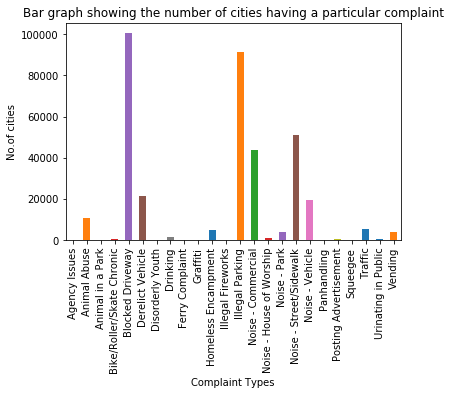

In [21]:
#Bar graph showing the number of cities having a particular complaint.
x=df.groupby('Complaint Type').City.count()
x.plot.bar()
plt.xlabel("Complaint Types")
plt.ylabel("No.of cities")
plt.title("Bar graph showing the number of cities having a particular complaint")
plt.show()

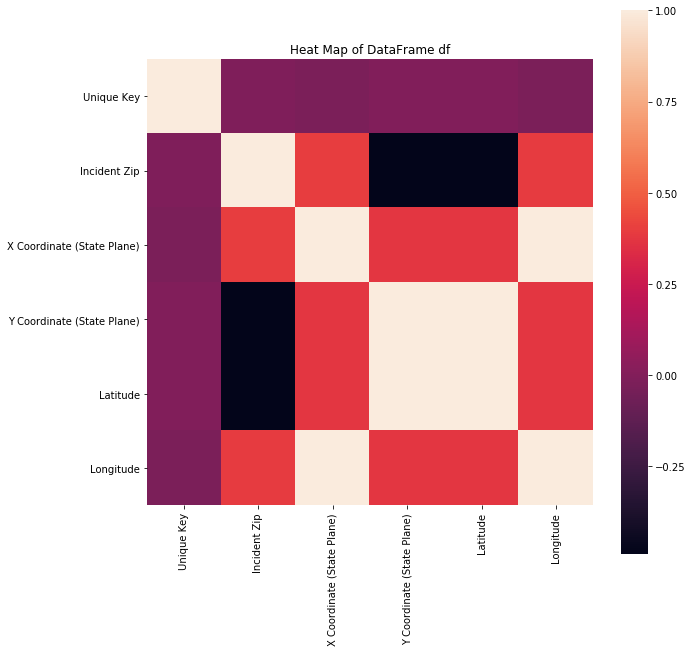

In [22]:
#Heat map
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), square=True)
plt.title("Heat Map of DataFrame df")
plt.show()

In [23]:
#count of incident zip
x=df['Incident Zip'].value_counts()
print(x)

11385.0    6396
11368.0    5384
11234.0    5199
11211.0    4854
11377.0    4525
11206.0    4462
11220.0    4422
11238.0    4403
11226.0    4328
11230.0    4179
10034.0    4155
11218.0    4152
10040.0    4036
11208.0    4015
11209.0    3927
10032.0    3816
11236.0    3758
11223.0    3748
11221.0    3710
11235.0    3580
11207.0    3573
11219.0    3550
11214.0    3503
10002.0    3494
10029.0    3459
11216.0    3453
10031.0    3441
11373.0    3439
11419.0    3431
10472.0    3373
           ... 
11239.0     179
10006.0     177
11040.0     129
83.0        110
10280.0     100
11109.0      98
10000.0      78
10282.0      56
10069.0      54
10281.0      35
11430.0      32
11697.0      31
10020.0      27
10162.0      19
10044.0      16
10803.0       4
10112.0       3
10119.0       3
10103.0       3
11695.0       3
11251.0       3
10041.0       3
11371.0       2
10048.0       2
10123.0       1
10153.0       1
10111.0       1
11241.0       1
11242.0       1
11451.0       1
Name: Incident Zip, Leng

In [24]:
# Count of cities for a particular Incident Zip
df2=df.groupby('Incident Zip').City.count()
print(df2)

Incident Zip
83.0        110
10000.0      78
10001.0    1584
10002.0    3494
10003.0    3179
10004.0     428
10005.0     547
10006.0     177
10007.0     708
10009.0    2692
10010.0     925
10011.0    2418
10012.0    1854
10013.0    1804
10014.0    1824
10016.0    1754
10017.0    1904
10018.0     780
10019.0    2672
10020.0      27
10021.0     946
10022.0    1291
10023.0    1831
10024.0    1385
10025.0    2800
10026.0    2617
10027.0    3171
10028.0    1191
10029.0    3459
10030.0    1507
           ... 
11411.0     618
11412.0    1047
11413.0    1094
11414.0    1149
11415.0    1009
11416.0    1685
11417.0    1761
11418.0    2335
11419.0    3431
11420.0    2664
11421.0    3103
11422.0    1091
11423.0    1230
11426.0     487
11427.0     679
11428.0     743
11429.0     828
11430.0      32
11432.0    2231
11433.0    1584
11434.0    1907
11435.0    2348
11436.0     829
11451.0       1
11691.0     958
11692.0     259
11693.0     439
11694.0     831
11695.0       3
11697.0      31
Name: City,

In [25]:
# Count of Complaints
x=df['Complaint Type'].value_counts()
print(x)

Blocked Driveway             100881
Illegal Parking               92679
Noise - Street/Sidewalk       51692
Noise - Commercial            44109
Derelict Vehicle              21661
Noise - Vehicle               19352
Animal Abuse                  10541
Traffic                        5198
Homeless Encampment            4879
Vending                        4192
Noise - Park                   4109
Drinking                       1409
Noise - House of Worship       1070
Posting Advertisement           681
Urinating in Public             641
Bike/Roller/Skate Chronic       478
Panhandling                     327
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Ferry Complaint                   2
Animal in a Park                  1
Name: Complaint Type, dtype: int64


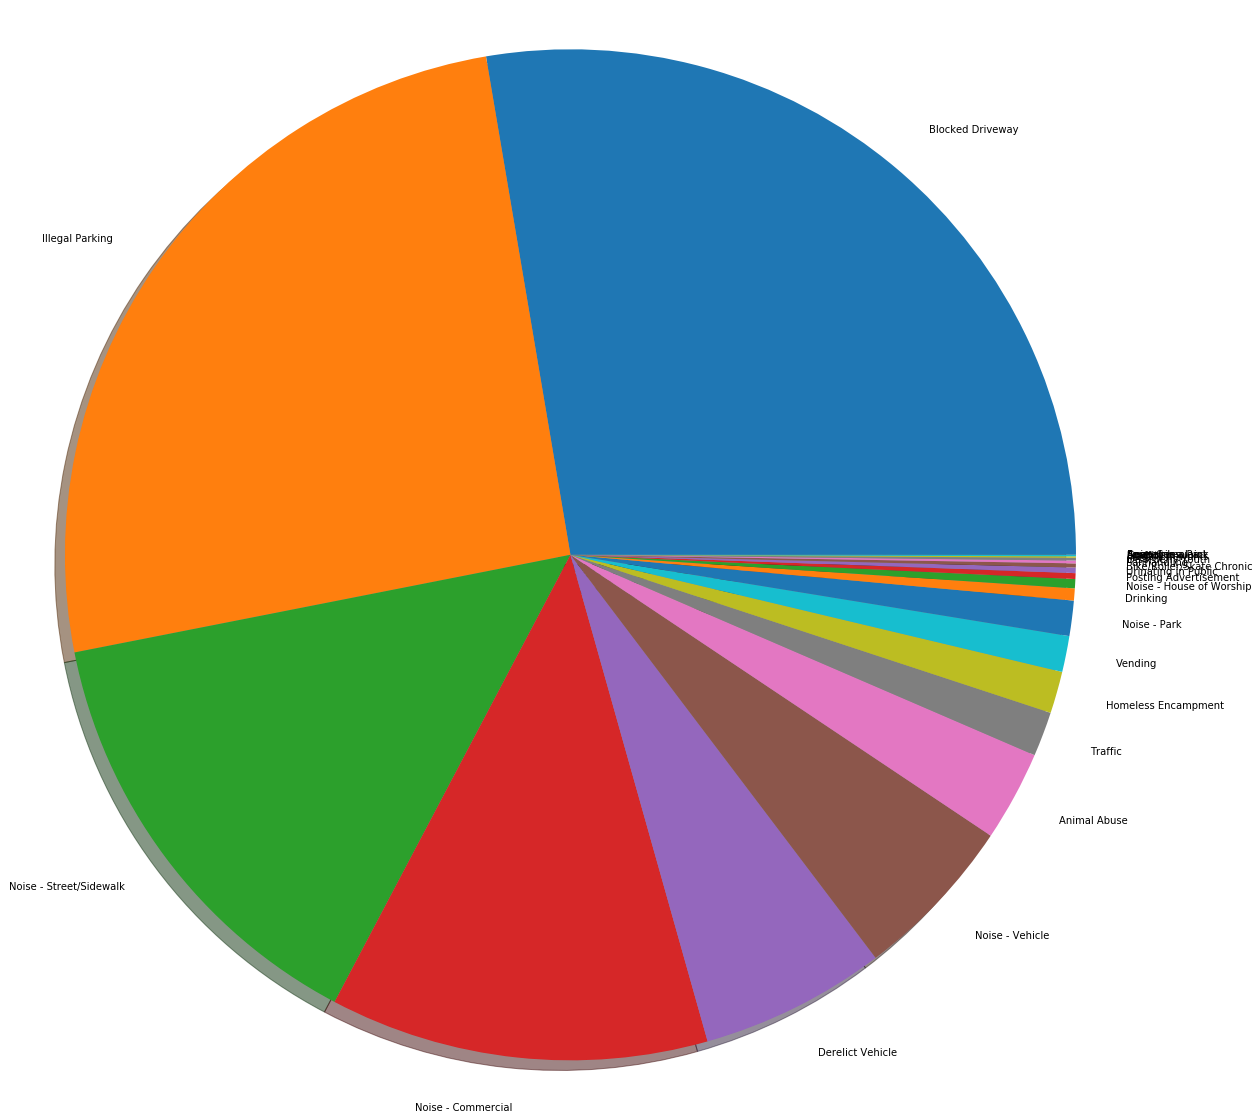

In [37]:
# Pie chart of Different compalints.
plt.figure(figsize=(20,20))
labels = x.keys()
sizes = x
# Plot
plt.pie(sizes,labels=labels,shadow=True)
 
plt.axis('equal')
plt.show()

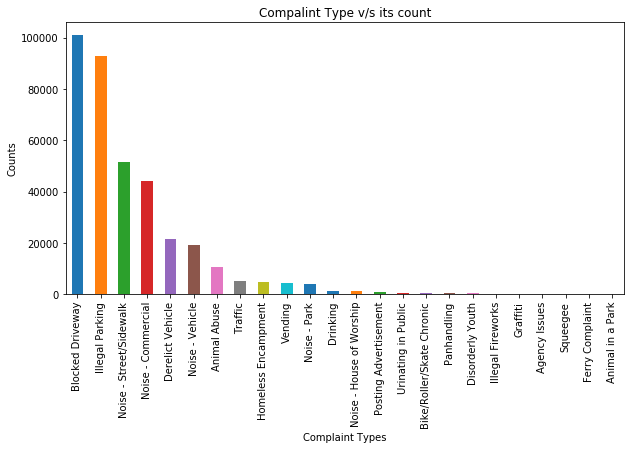

In [27]:
#Bar graph to show the compalint type and its count
plt.figure(figsize=(10,5))
x=df['Complaint Type'].value_counts()
x.plot.bar()
plt.xlabel("Complaint Types")
plt.ylabel("Counts")
plt.title("Compalint Type v/s its count")
plt.show()

In [28]:
#experiment

In [29]:
#Count of complaint type in a citywise manner
df1=df.groupby('Complaint Type').City.count()

In [30]:
#printing the df1
print(df1)

Complaint Type
Agency Issues                     0
Animal Abuse                  10529
Animal in a Park                  1
Bike/Roller/Skate Chronic       473
Blocked Driveway             100548
Derelict Vehicle              21460
Disorderly Youth                315
Drinking                       1401
Ferry Complaint                   0
Graffiti                        157
Homeless Encampment            4878
Illegal Fireworks               172
Illegal Parking               91412
Noise - Commercial            43687
Noise - House of Worship       1068
Noise - Park                   4083
Noise - Street/Sidewalk       51054
Noise - Vehicle               19294
Panhandling                     324
Posting Advertisement           680
Squeegee                          4
Traffic                        5195
Urinating in Public             641
Vending                        4185
Name: City, dtype: int64


In [31]:
#Display the complaint type and city together
df3=df[["City","Complaint Type"]]
print(df3)

                       City            Complaint Type
0                  NEW YORK   Noise - Street/Sidewalk
1                   ASTORIA          Blocked Driveway
2                     BRONX          Blocked Driveway
3                     BRONX           Illegal Parking
4                  ELMHURST           Illegal Parking
5                  BROOKLYN           Illegal Parking
6                  NEW YORK           Illegal Parking
7                     BRONX          Blocked Driveway
8               KEW GARDENS           Illegal Parking
9                  BROOKLYN          Blocked Driveway
10          JACKSON HEIGHTS          Blocked Driveway
11                    BRONX          Blocked Driveway
12                    BRONX   Noise - Street/Sidewalk
13                 BROOKLYN           Illegal Parking
14           MIDDLE VILLAGE          Derelict Vehicle
15                REGO PARK          Blocked Driveway
16             SAINT ALBANS          Blocked Driveway
17                 BROOKLYN 

In [32]:
#Find major complaint types

In [33]:
#Find the top 10 complaint types
x=df['Complaint Type'].value_counts()
print(x.head(10))

Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Noise - Vehicle             19352
Animal Abuse                10541
Traffic                      5198
Homeless Encampment          4879
Vending                      4192
Name: Complaint Type, dtype: int64


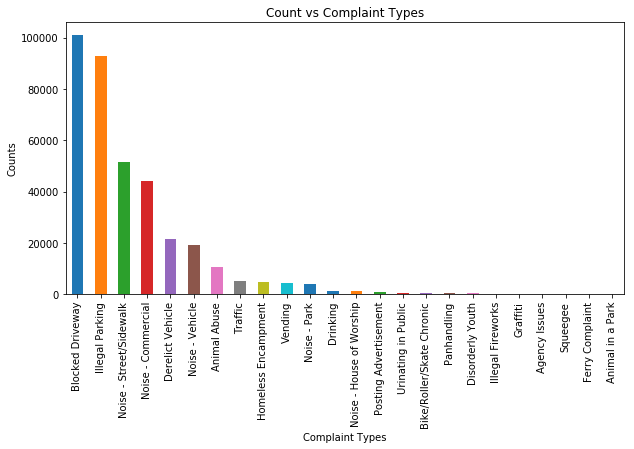

In [34]:
#Plot a bar graph of count vs complaint types
plt.figure(figsize=(10,5))
x=df['Complaint Type'].value_counts()
x.plot.bar()
plt.xlabel("Complaint Types")
plt.ylabel("Counts")
plt.title("Count vs Complaint Types")
plt.show()